In [68]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [60]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [61]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [62]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [63]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [64]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [65]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [66]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

# Exploratory Precipitation Analysis

In [67]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

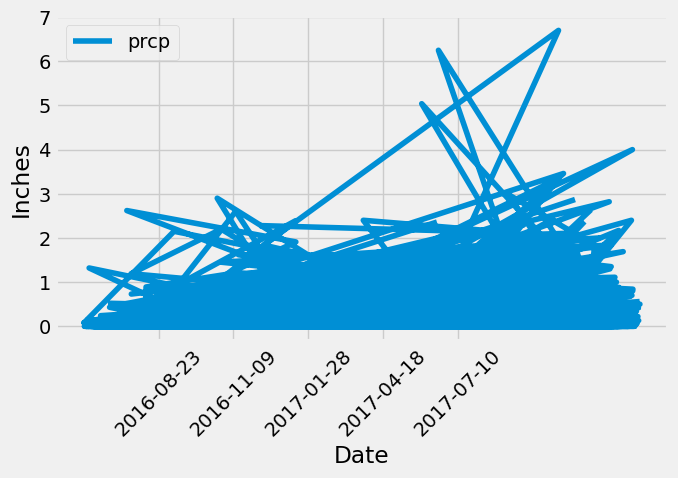

In [80]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
year_precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_precipitation_df = pd.DataFrame(year_precipitation, columns=['date', 'prcp'])

# Sort the dataframe by date
year_precipitation_df = year_precipitation_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_plot = year_precipitation_df.plot(figsize=(7,5), xticks=(300,600,900,1200,1500), rot=45)
prcp_plot.grid(True)
prcp_plot.legend()
prcp_plot.set_xticklabels(('2016-08-23', '2016-11-09', '2017-01-28','2017-04-18', '2017-07-10'))
prcp_plot.set_ylabel('Inches')
prcp_plot.set_xlabel('Date')
plt.tight_layout()
plt.show()

In [39]:
# Use Pandas to calculate the summary statistics for the precipitation data
year_precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station).count()
total_stations

9

In [43]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [44]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperatures = [measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
most_active_temps = session.query(*temperatures).filter(measurement.station=='USC00519281').all()
most_active_temps

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


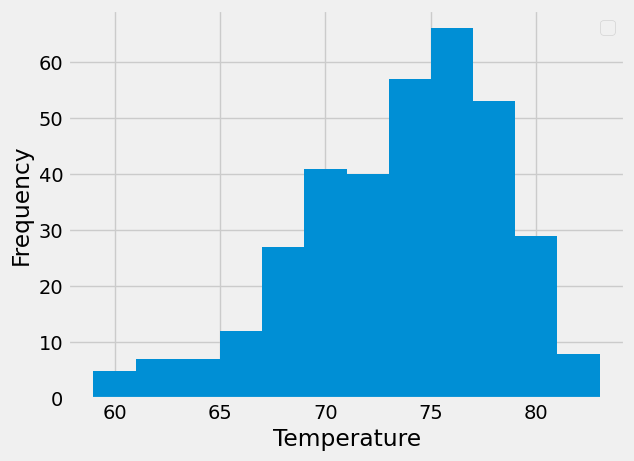

In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temps = session.query(measurement.date, (measurement.tobs)).filter(measurement.date >= year_ago).filter(measurement.station=='USC00519281').all()
year_temps_df = pd.DataFrame(year_temps)
plt.hist(year_temps_df['tobs'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()